# Shapping


In [1]:
import os
import pandas as pd

In [2]:
# Load and preprocess the train data 
from pipelines import preprocessing_pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = preprocessing_pipeline.fit_transform(train_data)
train_data.head()

,day_phase,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,morning,17.2,17.533333,17.866667,18.2,18.266667,18.333333,18.4,18.266667,18.133333,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,13.4
p01_1,morning,18.2,18.266667,18.333333,18.4,18.266667,18.133333,18.0,17.766667,17.533333,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.8
p01_2,morning,18.4,18.266667,18.133333,18.0,17.766667,17.533333,17.3,17.366667,17.433333,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,15.5
p01_3,morning,18.0,17.766667,17.533333,17.3,17.366667,17.433333,17.5,17.433333,17.366667,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,14.8
p01_4,morning,17.3,17.366667,17.433333,17.5,17.433333,17.366667,17.3,16.933333,16.566667,...,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,4.8,12.7


In [3]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['bg+1:00'])
y = train_data['bg+1:00']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from pipelines import standardization_pipeline

X_train = standardization_pipeline.fit_transform(X_train)
X_test = standardization_pipeline.transform(X_test)

X_train.head()

,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,...,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p10_13703,-0.160550,-0.227642,-0.294506,-0.427760,-0.528647,-0.695551,-0.828238,-0.962549,-1.028969,-1.128165,...,1.591285,0.902194,0.493961,2.500308,4.488931,4.499493,0,0,0,1
p02_18411,-0.260660,-0.428056,-0.528303,-0.794898,-1.029959,-1.230087,-1.295368,-1.329869,-1.329340,-1.161507,...,-0.870419,-0.856217,-0.872007,-0.865794,-0.866998,-0.865785,0,0,1,0
p03_18453,0.540223,0.640819,0.807679,0.807158,0.540817,0.340110,0.206124,0.406557,0.439507,0.472247,...,0.207226,-0.167393,-0.196090,-0.176923,-0.141716,-0.204493,0,0,1,0
p12_16252,-1.028173,-0.929091,-0.895698,-0.861650,-0.829434,-0.829185,-0.794871,-0.795584,-0.795348,-0.761404,...,-0.197865,-0.235167,-0.206370,-0.201296,-0.213076,-0.203178,0,1,0,0
p11_20717,-0.093810,-0.094032,-0.194307,-0.093998,0.039506,0.139660,0.172757,0.072629,0.039013,0.072144,...,-0.326403,-0.339907,-0.333587,-0.328295,-0.307791,-0.314927,0,0,1,0


In [5]:
from xgboost import XGBRegressor

model_depth1 = XGBRegressor()
model_depth1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
import shap

shap_values = shap.TreeExplainer(model_depth1).shap_values(X_test)


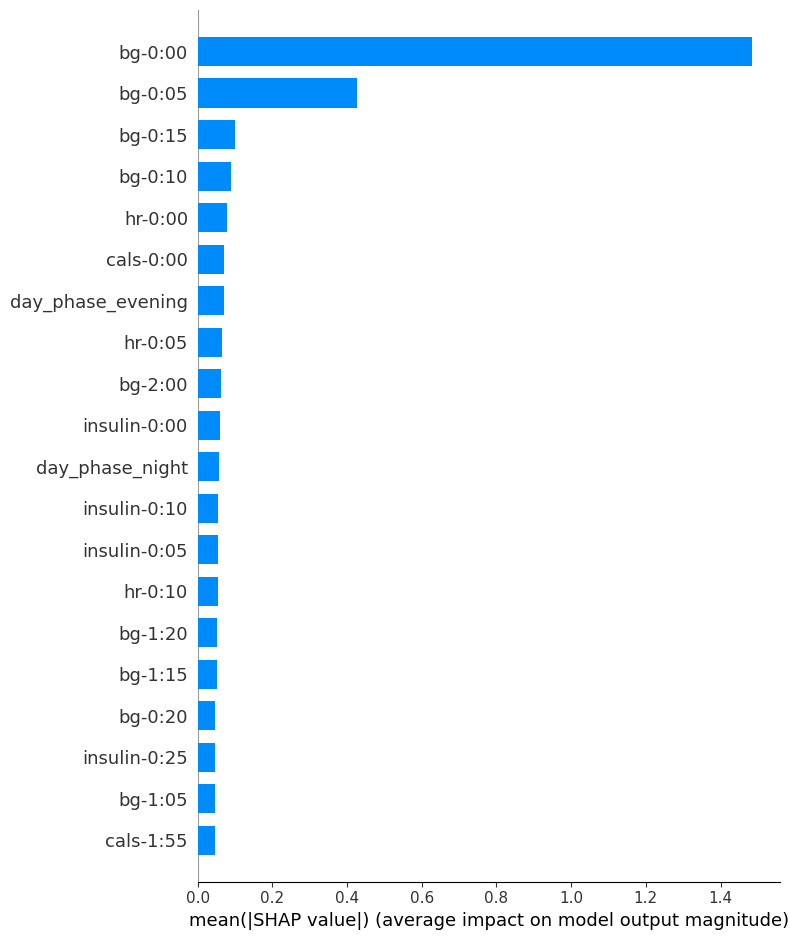

In [7]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

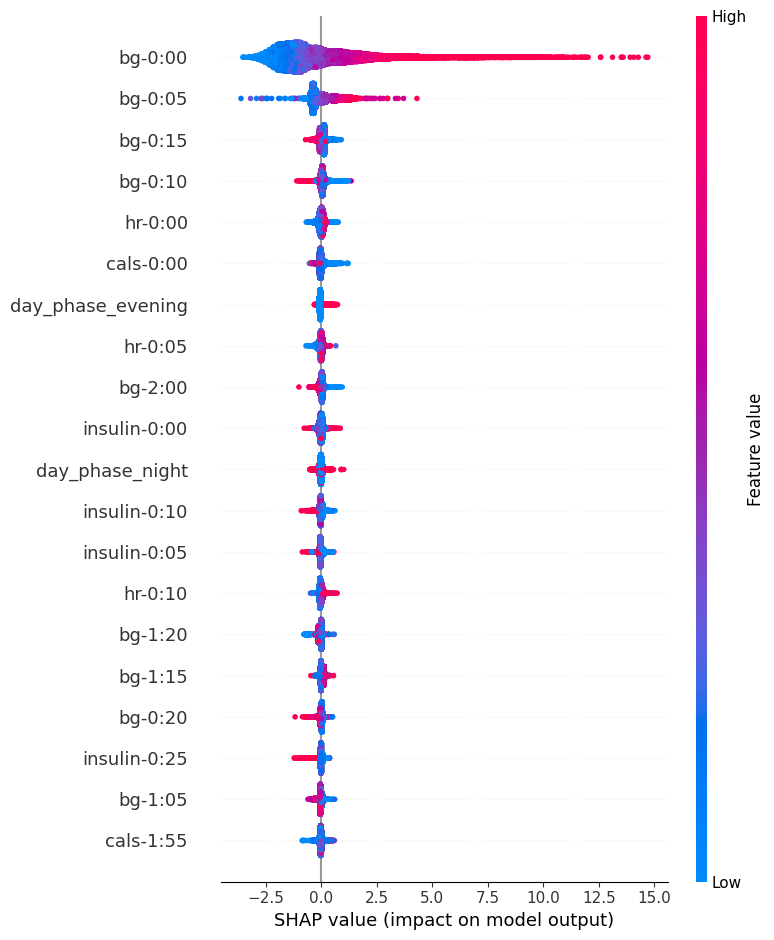

In [8]:
shap.summary_plot(shap_values, X_test)

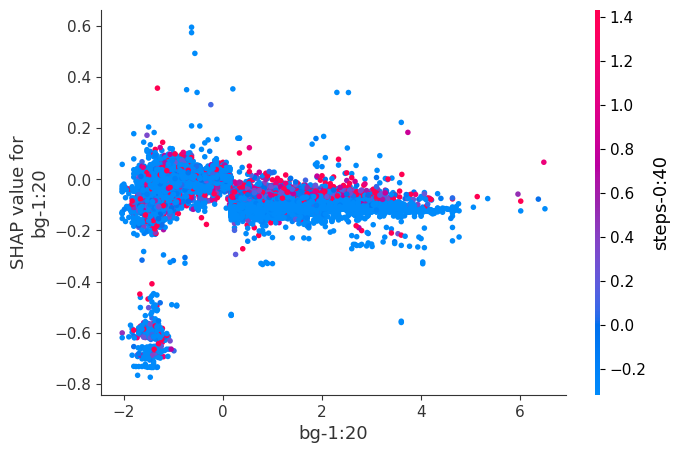

In [9]:
shap.dependence_plot(8, shap_values, X_test)